
<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Data visualization avec Seaborn</h1></center>
<center><h2>Graphiques multiples</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


In [1]:
## Exécuter la cellule pour importer les packages/fichiers nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set() # pour modifier le thème

df= pd.read_csv('nba_sb2.csv', index_col= 0)


### FacetGrid

> Lorsque l'exploration d'un jeu de données nécessite de visualiser la distribution d'une variable ou une relation entre plusieurs variables, à l'intérieur de sous-ensembles des données, la classe **FacetGrid** se révèle très utile.
> Les objets **FacetGrid** sont des *Figures* de *`Maltplotlib`* multi-dimensionnels qui permettent d'afficher des graphiques à partir de sous-ensembles de données divisés par lignes(`row`), par colonnes (`col`) et par une troisième dimension grâce à l'argument `hue`.

>La majorité des fonctions utilisées dans ce tutoriel (`relplot, catplot, lmplot`) utilisent et retournent des objets **FacetGrid** directement, mais il est possible d'instancier ce type de graphiques manuellement afin de créer des graphiques particuliers et personnalisés


> Pour créer une figure multi-graphiques à l'aide de la fonction `FacetGrid`, il suffit de lui donner en argument le nom du *dataset* et des variables à utiliser sur une ou plusieurs des 3 dimensions. La où les variables doivent être catégorielles ou discrètes. Une grille est ainsi créée et pour chaque variable utilisée le long d'un axe, la grille sépare les différents graphiques selon les modalités prises le long de cet axe.

> Pour ajouter un graphique à chaque case de la grille ainsi crée, on utilise la méthode **`map`** à l'intérieur de laquelle on indique la fonction à utiliser et les différents paramètres à régler. 
>
>
```py
g = sns.FacetGrid(df, row="var1")
## on crée autant de sous-graphiques que la variable var1 possède de valeurs
g.map(plt.scatter, "var2", "var3", s=5, alpha=.5, color="red")
## on affiche des nuages de points entre var2 et var3, dans chacun des sous-graphiques
```

* En utilisant la fonction `FacetGrid`, afficher un graphique composé de deux colonnes, différenciant les joueurs en fonction de leur conférence, et afficher dans chacun des deux graphes l'histogramme de la variable **'age'**.


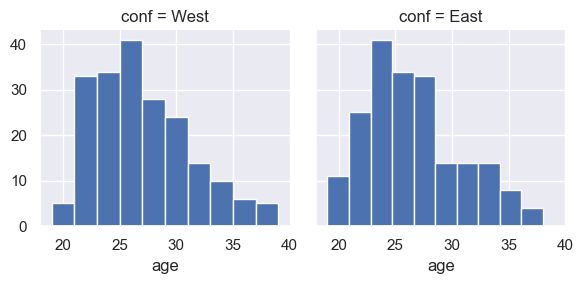

In [3]:
## Insérez votre code ici
g = sns.FacetGrid(df,col='conf');
g.map(plt.hist, 'age');
# g.map_dataframe(sns.histplot, 'age')
# sns.displot(x=df['age'], kind='hist')

* En utilisant la fonction `FacetGrid`, afficher un graphique contenant les nuages de points entre les variables **'mp'** et **ft.'**, séparés sur une grille par la variable **'po'** en colonnes, la variable **'pos'** en lignes, avec les points colorés en fonction de la variable **'conf'**.

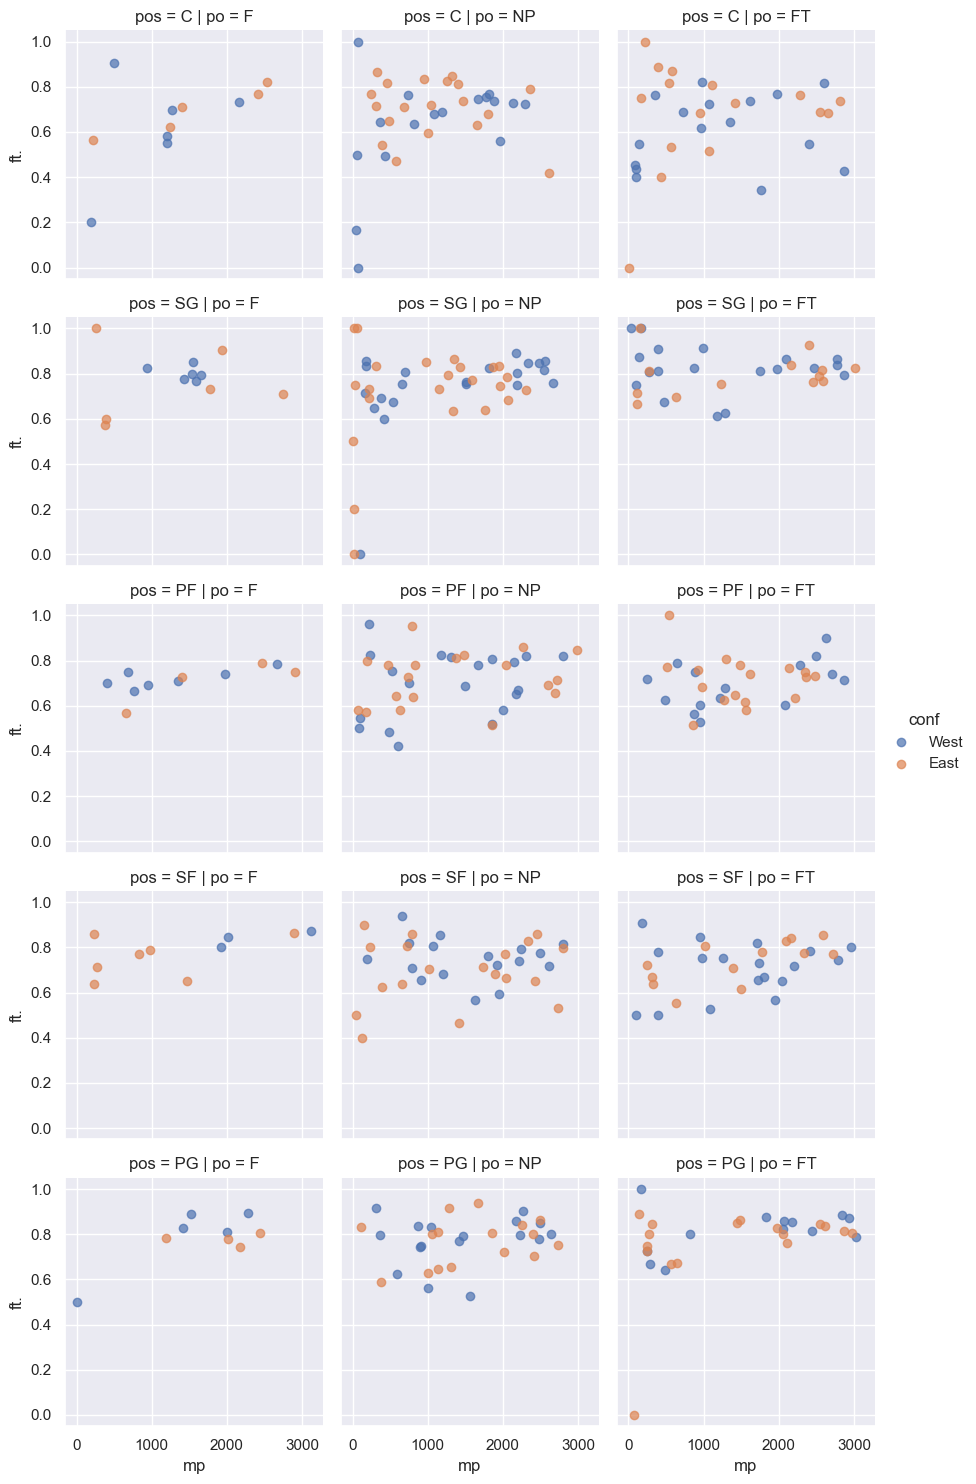

In [5]:
## Insérez votre code ici
g = sns.FacetGrid(df,row='pos',col='po',hue='conf');
g.map(plt.scatter,'mp','ft.', alpha=0.7);
g.add_legend();

### PairGrid


> Tout comme `FacetGrid`, `PairGrid` permet de créer des grilles multi-figures contenant le même type de graphique, pour visualiser rapidement un jeu de données

> Cependant, à l'inverse d'un `FacetGrid` dans lequel chaque case représente la même relation mais selon les différentes modalités d'une ou de plusieurs variables, dans un `PairGrid`, chaque ligne et chaque colonne correspondent à une variable différente. Ainsi chaque case relie un couple de variables et permet de visualiser les relations entre chaque paire de variables d'un *dataset* .

> La fonction **`pairplot`** vue au cours de la formation utilise et retourne un objet `PairGrid`.


> La fonction `PairGrid` n'a besoin que du nom du *dataset* pour initialiser la grille. Elle peut également contenir différents paramètres comme une variable catégorielle dans l'argument `hue` pour colorer les graphiques en fonction de ses modalités.<br>

> La méthode **`map`** est ensuite appelée pour remplir les cases de la grille avec un type de graphique.<br> 
>Afin d'afficher des types de graphiques différents sur la diagonale de la grille, les méthodes**`map_diag`** et **`map_offdiag`** peuvent être utilisées à la place, pour sélectionner respectivement le type de graphique à visualiser sur la diagonale et en dehors. 

* Afficher un nuage de points entre chaque paire de variables quantitatives parmi les colonnes 14 à 20 de **df**.<br>
Les points seront colorés selon les modalités de la variable **'po'**, et d'opacité 0.6.<br>
Grâce à une commande *Matplotlib*, ajouter les légendes.

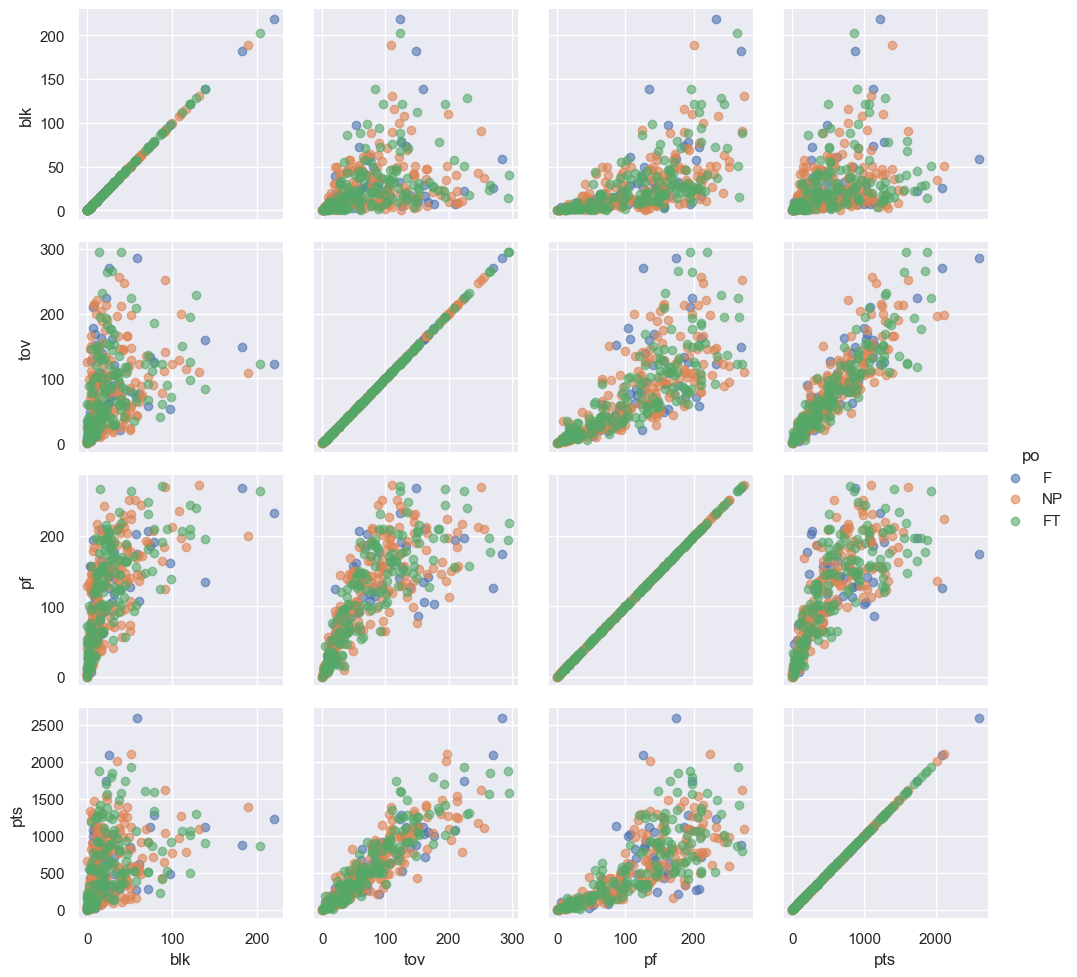

In [6]:
## Insérez votre code ici
g = sns.PairGrid(df.iloc[:,14:21],hue='po');
g.map(plt.scatter,alpha=0.6);
g.add_legend();

* Afficher dans un `PairGrid` des colonnes 1 à 5 de **df**, la courbe de densité estimée de chaque variable, ainsi que la densité bivariée estimée entre chaque paire de variable sur 6 niveaux à l'aide de la fonction [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

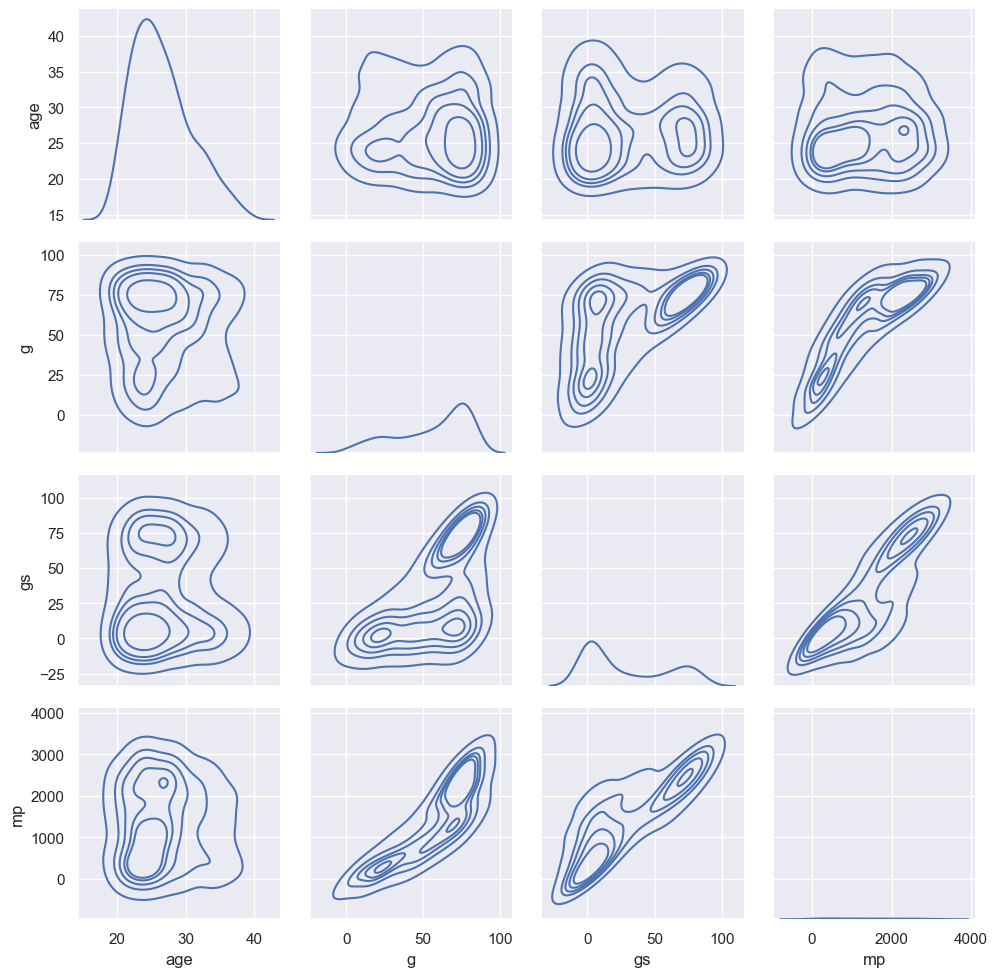

In [7]:
## Insérez votre code ici
g = sns.PairGrid(df.iloc[:,1:6]);
g.map_diag(sns.kdeplot);
g.map_offdiag(sns.kdeplot, n_levels=6);

> Félicitations, vous êtes maintenant capables de créer tout type de graphiques à l'aide des bibliothèques ***Matplotlib*** et ***Seaborn***.
> ***Seaborn*** est une bibliothèque facile d'accès à qui maîtrise les fondamentaux de *Matplotlib*. Elle a été créée pour simplifier l'affichage de graphiques statistiques, et remplit bien son rôle de complément à *Matplotlib*.

> Ce tutoriel n'aborde cependant pas la personnalisation possible des thèmes, axes et palettes de couleurs. Un simple passage sur les liens suivants vous permettront d'étudier le sujet rapidement:
Lien 1: [Customisation des figures](https://seaborn.pydata.org/tutorial/aesthetics.html) Lien 2: [palette couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)

> Envie de plus d'interactivité dans vos graphiques ? Initiez-vous à la bibliothèque **Bokeh** !